# ERA5 

This is a script designed to obtain snow data from the ERA5 reanalysis product. We will be using the Copernicus API to get global, daily snow cover and snow depth information.

This code is adapted from Tasha Snow's ERA5 downloading script: https://github.com/tsnow03/Landsat_SST_algorithm/blob/main/ERADownload.ipynb

The Copernicus Climate Data Store (CDS) API is not on CryoCloud by default, so the following cell needs to be run, followed by restarting the kernel.

To use the CDS API, the user needs credentials to the Copernicus Climate Data Store (CDS). Upon getting a user ID (`uid`) and an API key (`api-key`), they need to run the following cell (skip if you already have `./cdsapirc` in the `/home/jovyan/` directory).

In [ ]:
# !echo url: https://cds.climate.copernicus.eu/api/v2 >> /home/jovyan/.cdsapirc
# !echo key: {uid}:{api-key} >> /home/jovyan/.cdsapirc

In [1]:
from ecmwfapi import ECMWFDataServer # Need a ecmwf user name and password first
import cdsapi

The CDS API can be a bit picky with inputs from ERA5, so first-time users are encouraged to use the online request form (https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download) to automatically generate a code for their API request, to ensure that the syntax is correct.

The below functions retrieve ERA5 snow depth and snow density and download them to a `tmp/` folder. Additional parameters to consider:
* `yearStart` and `yearEnd`: Start and end year.
* `monthStart` and `monthEnd`: Start and end month.
* `dayStart` and `dayEnd`: Start and end day.

The function currently grabs daily data from March 1, 2020 - April 30, 2020 at 12:00 UTC each day, and downloads as daily netCDF files. Because ERA5 is generated hourly, users can expand the `time` entry to include more hours per day.

In [15]:
from pathlib import Path

# Initialize the CDS API
c = cdsapi.Client()

def retrieve_era5():
    """      
       A function to demonstrate how to iterate efficiently over several years and months etc    
       for a particular ERA5 request.
    """
    yearStart = 2020
    yearEnd = 2020
    monthStart = 3
    monthEnd = 3
    dayStart = 1
    dayEnd = 31
    for year in list(range(yearStart, yearEnd + 1)):
        for month in list(range(monthStart, monthEnd + 1)):
            for day in list(range(dayStart, dayEnd + 1)):
                startDy = '%02d' % (day)
                startMo = '%02d' % (month)
                startYr = '%04d' % (year)
                tmp_dir = Path.cwd() / "tmp"
                tmp_dir.mkdir(exist_ok=True)
                target = f"{tmp_dir}/era5_SWE_{startYr}{startMo}{startDy}.nc"
                era5_request(startYr, startMo, startDy, target)

def era5_request(startYr, startMo, startDy, target):
    """      
        Helper function for era5_retrieve. An ERA-5 request for snow
        depth and snow cover data for the given years/months/days.

        Inputs
        ------------
        startYr: str
            Starting year of data query, in YYYY format.
        startMo: str
            Starting month of data query, in MM format.
        startDy: str
            Starting day of data query, in DD format.
        target: str
            Path and name of netCDF file to be saved.
    """
    c.retrieve(
    'reanalysis-era5-land',
    {
        'product_type':['reanalysis'],
        'data_format':'netcdf',
        'variable':['snow_depth', 'snow_cover'],
        'year':[startYr],
        'month':[startMo],
        'day':[startDy],
        'time':['12:00']
    },
    target)
        
if __name__ == '__main__':
    retrieve_era5()

2025-08-21 15:37:07,794 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-08-21 15:37:08,455 INFO Request ID is 426af594-946b-43ed-8904-5e6b422d32e9
2025-08-21 15:37:08,842 INFO status has been updated to accepted
2025-08-21 15:37:23,259 INFO status has been updated to successful


f5fc668f99fa433c22c9ea79bae5547f.zip:   0%|          | 0.00/2.63M [00:00<?, ?B/s]

2025-08-21 15:37:27,712 INFO Request ID is e70437ae-c3f9-4286-a19e-c6884775544c
2025-08-21 15:37:27,902 INFO status has been updated to accepted
2025-08-21 15:37:42,094 INFO status has been updated to successful


b66a28473b13ee15f79e053bbffc4651.zip:   0%|          | 0.00/2.62M [00:00<?, ?B/s]

2025-08-21 15:37:45,463 INFO Request ID is 6583174f-8e3f-4ecc-9179-425ca02e7eb7
2025-08-21 15:37:45,635 INFO status has been updated to accepted
2025-08-21 15:37:54,513 INFO status has been updated to running
2025-08-21 15:37:59,761 INFO status has been updated to successful


9cb04ee28e528934597a0d30ec0a4a0a.zip:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

2025-08-21 15:38:02,928 INFO Request ID is 502dea69-f4cf-4121-a17a-10005b71e819
2025-08-21 15:38:03,105 INFO status has been updated to accepted
2025-08-21 15:38:17,245 INFO status has been updated to successful


421312261b53bb75e7b54ffbfc08e7fd.zip:   0%|          | 0.00/2.58M [00:00<?, ?B/s]

2025-08-21 15:38:20,447 INFO Request ID is b3b3efcb-fc66-4e73-9235-4362710f58f6
2025-08-21 15:38:20,698 INFO status has been updated to accepted
2025-08-21 15:38:29,626 INFO status has been updated to running
2025-08-21 15:38:34,883 INFO status has been updated to successful


1e6e6926e2f70ae589073cc405506899.zip:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

2025-08-21 15:38:38,759 INFO Request ID is 17ae3a3c-f6ba-40d1-ab2b-9f60faf36f64
2025-08-21 15:38:39,020 INFO status has been updated to accepted
2025-08-21 15:38:53,454 INFO status has been updated to running
2025-08-21 15:39:01,287 INFO status has been updated to successful


c3bc24ac62fe82da3cb980fa822c66cc.zip:   0%|          | 0.00/2.55M [00:00<?, ?B/s]

2025-08-21 15:39:05,132 INFO Request ID is 96453808-11e2-42dc-a4e9-cae0c209346b
2025-08-21 15:39:05,313 INFO status has been updated to accepted
2025-08-21 15:39:19,470 INFO status has been updated to successful


c90a704e9cd63b205c1f4ec3c14d382d.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:39:23,061 INFO Request ID is e0e64efa-91b0-4bce-80eb-8be2477fa4f9
2025-08-21 15:39:23,249 INFO status has been updated to accepted
2025-08-21 15:39:32,603 INFO status has been updated to running
2025-08-21 15:39:38,036 INFO status has been updated to successful


ac01451f5ad656331f1502c55f9f7237.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:39:41,837 INFO Request ID is 220841b4-6980-4800-8570-bc037e8fe711
2025-08-21 15:39:42,077 INFO status has been updated to accepted
2025-08-21 15:39:51,377 INFO status has been updated to running
2025-08-21 15:39:56,659 INFO status has been updated to successful


6618e9797462db92592bcffc69a46613.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:40:00,114 INFO Request ID is d613f643-4f9f-4044-b005-7ccc192941c8
2025-08-21 15:40:00,288 INFO status has been updated to accepted
2025-08-21 15:40:14,612 INFO status has been updated to successful


89c296ad2ea1011f813e38bea837c667.zip:   0%|          | 0.00/2.53M [00:00<?, ?B/s]

2025-08-21 15:40:17,865 INFO Request ID is 1bdd0095-c432-4714-94f9-49cd0c54ca44
2025-08-21 15:40:18,113 INFO status has been updated to accepted
2025-08-21 15:40:32,463 INFO status has been updated to running
2025-08-21 15:40:40,859 INFO status has been updated to successful


2efb330354b85153593086ed13218576.zip:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

2025-08-21 15:40:45,049 INFO Request ID is 1ec3d1cb-3ef9-4385-8feb-591f67b56ef8
2025-08-21 15:40:45,229 INFO status has been updated to accepted
2025-08-21 15:40:54,196 INFO status has been updated to running
2025-08-21 15:40:59,532 INFO status has been updated to successful


2a28600a4214f90ba9512beff7244410.zip:   0%|          | 0.00/2.49M [00:00<?, ?B/s]

2025-08-21 15:41:02,953 INFO Request ID is fb369ae2-0ffd-4251-98db-514afacd0d41
2025-08-21 15:41:03,203 INFO status has been updated to accepted
2025-08-21 15:41:17,522 INFO status has been updated to running
2025-08-21 15:41:25,293 INFO status has been updated to successful


e0e9d7ff817f0856999176769eeb171f.zip:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

2025-08-21 15:41:30,098 INFO Request ID is 73f97b71-ad62-4d74-841e-84d33ddea6a6
2025-08-21 15:41:30,331 INFO status has been updated to accepted
2025-08-21 15:41:44,539 INFO status has been updated to successful


ef6173043ccfb20c17b9b28f8f8d8e35.zip:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

2025-08-21 15:41:47,934 INFO Request ID is 5e2efc07-fb13-4081-94f8-77db3075c65a
2025-08-21 15:41:48,111 INFO status has been updated to accepted
2025-08-21 15:41:57,022 INFO status has been updated to running
2025-08-21 15:42:02,288 INFO status has been updated to successful


1fee4753ddd99eac6e5e272c0db9d2f0.zip:   0%|          | 0.00/2.53M [00:00<?, ?B/s]

2025-08-21 15:42:05,470 INFO Request ID is 85c44722-3a0f-4123-83d5-6fe81f74887a
2025-08-21 15:42:05,665 INFO status has been updated to accepted
2025-08-21 15:42:14,544 INFO status has been updated to running
2025-08-21 15:42:19,786 INFO status has been updated to successful


84dc5304fd9bf9762907bdae2eb5f9a6.zip:   0%|          | 0.00/2.55M [00:00<?, ?B/s]

2025-08-21 15:42:24,128 INFO Request ID is 82139a36-dee1-4e30-be8e-d298a83cdf72
2025-08-21 15:42:24,505 INFO status has been updated to accepted
2025-08-21 15:42:38,655 INFO status has been updated to running
2025-08-21 15:42:46,438 INFO status has been updated to successful


30aa0f87dc6193ca7e8c1b15e241ece7.zip:   0%|          | 0.00/2.55M [00:00<?, ?B/s]

2025-08-21 15:42:50,360 INFO Request ID is a58844eb-9119-45c9-8341-76745cc8a038
2025-08-21 15:42:50,537 INFO status has been updated to accepted
2025-08-21 15:43:04,667 INFO status has been updated to running
2025-08-21 15:43:12,441 INFO status has been updated to successful


8f618d8324ef68e2fbb1babbea7a5c77.zip:   0%|          | 0.00/2.53M [00:00<?, ?B/s]

2025-08-21 15:43:15,438 INFO Request ID is 6838ce56-37a0-4f42-be0f-bbda1223f620
2025-08-21 15:43:15,629 INFO status has been updated to accepted
2025-08-21 15:43:29,821 INFO status has been updated to running
2025-08-21 15:44:06,515 INFO status has been updated to successful


ec7e9f80d88904f963d737ff0c517456.zip:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

2025-08-21 15:44:09,671 INFO Request ID is 0c20e276-9026-4279-916c-97aec2a1ab0b
2025-08-21 15:44:09,852 INFO status has been updated to accepted
2025-08-21 15:44:24,235 INFO status has been updated to running
2025-08-21 15:44:43,593 INFO status has been updated to successful


7077c412999b3a772f9d3d9dabb4feae.zip:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

2025-08-21 15:44:48,996 INFO Request ID is 2c58b60d-0baa-41f9-9f15-8b55bc604c14
2025-08-21 15:44:49,174 INFO status has been updated to accepted
2025-08-21 15:44:58,111 INFO status has been updated to running
2025-08-21 15:45:03,351 INFO status has been updated to successful


b9d4d72c471de39934810b56ea471cf5.zip:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

2025-08-21 15:45:07,612 INFO Request ID is 93908675-45a4-4355-a268-72e8ce798ee9
2025-08-21 15:45:07,833 INFO status has been updated to accepted
2025-08-21 15:45:21,972 INFO status has been updated to running
2025-08-21 15:45:41,332 INFO status has been updated to successful


f078f8af853d30020a07ab4f054258f4.zip:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

2025-08-21 15:45:48,421 INFO Request ID is 8db1bd35-996a-4e28-9e22-9d7f817254e0
2025-08-21 15:45:48,597 INFO status has been updated to accepted
2025-08-21 15:45:57,508 INFO status has been updated to running
2025-08-21 15:46:02,813 INFO status has been updated to successful


edb9791f07893b1209c57a640663eac2.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:46:05,890 INFO Request ID is 2e966186-6743-4d50-b2d7-4d58fbadcaf4
2025-08-21 15:46:06,077 INFO status has been updated to accepted
2025-08-21 15:46:20,438 INFO status has been updated to running
2025-08-21 15:46:28,209 INFO status has been updated to successful


63ba086126d387cb2a8db5b0df588bb.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:46:31,299 INFO Request ID is 18250cde-54d6-471d-9d0e-d63921489184
2025-08-21 15:46:31,497 INFO status has been updated to accepted
2025-08-21 15:46:40,358 INFO status has been updated to running
2025-08-21 15:46:45,597 INFO status has been updated to successful


c6d43112ea5079ce637df07ad5eeacda.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:46:48,834 INFO Request ID is c93572f1-596e-42ed-b0c6-0f207600300d
2025-08-21 15:46:49,030 INFO status has been updated to accepted
2025-08-21 15:47:03,170 INFO status has been updated to successful


f20b69ce6e4807a38a02dae1b39076dc.zip:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

2025-08-21 15:47:06,417 INFO Request ID is 24ae473b-73ac-4a85-bb16-3b27bef05701
2025-08-21 15:47:06,596 INFO status has been updated to accepted
2025-08-21 15:47:15,739 INFO status has been updated to running
2025-08-21 15:47:20,996 INFO status has been updated to successful


f8d169f589da9e958d0ed4b35b01d9ab.zip:   0%|          | 0.00/2.55M [00:00<?, ?B/s]

2025-08-21 15:47:24,137 INFO Request ID is dac16645-674d-41b4-9ae4-d1e411858fa9
2025-08-21 15:47:24,334 INFO status has been updated to accepted
2025-08-21 15:47:38,623 INFO status has been updated to running
2025-08-21 15:47:46,399 INFO status has been updated to successful


cb52843080f2a175a3057f56beae1f9.zip:   0%|          | 0.00/2.54M [00:00<?, ?B/s]

2025-08-21 15:47:49,735 INFO Request ID is ed0635b7-5a20-48c7-9f76-14734c10e417
2025-08-21 15:47:49,916 INFO status has been updated to accepted
2025-08-21 15:48:04,133 INFO status has been updated to running
2025-08-21 15:48:11,922 INFO status has been updated to successful


ccfbf13004165eb71992168252346825.zip:   0%|          | 0.00/2.53M [00:00<?, ?B/s]

2025-08-21 15:48:14,947 INFO Request ID is 9e6923be-7861-4ce4-ae42-42b5981baf14
2025-08-21 15:48:15,123 INFO status has been updated to accepted
2025-08-21 15:48:29,228 INFO status has been updated to running
2025-08-21 15:48:36,999 INFO status has been updated to successful


3ce931da17d0e4c847c9d18128e0da5a.zip:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

2025-08-21 15:48:40,016 INFO Request ID is 13234959-d3a1-4922-9453-c39183cd65c9
2025-08-21 15:48:40,254 INFO status has been updated to accepted
2025-08-21 15:48:54,498 INFO status has been updated to running
2025-08-21 15:49:02,296 INFO status has been updated to successful


8e64bd8fe221d1d5fdb0dd79ad26f485.zip:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

Depending on the number of files downloaded (31 in the case of the above example), it can take a while to download everything.

When it finishes, there should now be daily ERA5 data in netCDF format! To efficiently load all of this data, we are going to use Xarray and its `open_mfdataset()` function. 

In [2]:
import os
import re
import zipfile
import xarray as xr

from os import listdir
from os.path import join

In [3]:
def process_era5_data(tmp_path):
    # Find ERA5 Zip files in downloaded directory
    era5_files = [join(tmp_path,f) for f in listdir(tmp_path) if "era5_" in join(tmp_path, f)]
    
    # Iteratively unzip each file and collect into a list
    tmp_files = era5_extract(era5_files, tmp_dir)

    print('------------')
    # Open all ERA5 files into single Xarray
    ds = xr.open_mfdataset(tmp_files)
    print("All data has been lazy-loaded into Xarray.")

    # Remove extracted files, for cleanliness
    for file in tmp_files:
        os.remove(file)
    print("Extracted ERA-5 files deleted.")

    return ds

def era5_extract(era5_files, tmp_dir):
    for file in era5_files:
        with zipfile.ZipFile(file, 'r') as zfile:
            print(f'Now extracting data for file: {file}')
            # Extract all files from current Zip file
            zfile.extractall(tmp_dir)

            # Rename output file to prevent overwriting
            outfile = join(tmp_dir, "data_0.nc")
            date_pattern = re.search(r'\d{8}', file).group(0)
            newfile = join(tmp_dir, f'data_{date_pattern}.nc')
            os.rename(outfile, newfile)
            print(f'Data extracted and saved to file: data_{date_pattern}.nc')
            print(' ')

    # List of output files
    tmp_files = [join(tmp_dir,f) for f in os.listdir(tmp_dir) if "data_" in join(tmp_dir, f)]

    return tmp_files

In [ ]:
tmp_dir = Path.cwd() / "tmp"
ds = process_era5_data(tmp_dir)

Now extracting data for file: /Users/alexlewandowski/Documents/icesat-2/snow-cookbook/notebooks/tmp/era5_SWE_20200311.nc
Data extracted and saved to file: data_20200311.nc
 
Now extracting data for file: /Users/alexlewandowski/Documents/icesat-2/snow-cookbook/notebooks/tmp/era5_SWE_20200325.nc
Data extracted and saved to file: data_20200325.nc
 
Now extracting data for file: /Users/alexlewandowski/Documents/icesat-2/snow-cookbook/notebooks/tmp/era5_SWE_20200301.nc
Data extracted and saved to file: data_20200301.nc
 
Now extracting data for file: /Users/alexlewandowski/Documents/icesat-2/snow-cookbook/notebooks/tmp/era5_SWE_20200321.nc
Data extracted and saved to file: data_20200321.nc
 
Now extracting data for file: /Users/alexlewandowski/Documents/icesat-2/snow-cookbook/notebooks/tmp/era5_SWE_20200315.nc
Data extracted and saved to file: data_20200315.nc
 
Now extracting data for file: /Users/alexlewandowski/Documents/icesat-2/snow-cookbook/notebooks/tmp/era5_SWE_20200305.nc
Data extr

In [6]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 31, latitude: 1801, longitude: 3600)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 248B 2020-03-01T12:00:00 ... 2020...
  * latitude    (latitude) float64 14kB 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude   (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
    expver      <U4 16B '0001'
Data variables:
    sde         (valid_time, latitude, longitude) float32 804MB dask.array<chunksize=(1, 901, 1800), meta=np.ndarray>
    snowc       (valid_time, latitude, longitude) float32 804MB dask.array<chunksize=(1, 901, 1800), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-21T22:01 GRIB to CDM+CF via cfgrib-0.9.1...

Thanks to the above function, loading all of that data is pretty easy! However, it is important to note that the data is currently "lazy-loaded" - we can easily subset and resample the data for our needs, but we will need to load it into memory if we wish to make figures.

Fully loading the data as is can be time-consuming, so let's reduce the data first, starting with making monthly means of snow depth.

In [7]:
# Calculate monthly mean snow depth and snow cover
era5_monthly = ds.resample(valid_time='1ME').mean()

Resampling to monthly means reduces the data volume by quite a bit, so let's now look at global snow depth from the month of March. We will go ahead and load the result into memory using the `compute()` function.

In [8]:
# Load March snow depths into memory
era5_sd_march = era5_monthly['snowc'].compute().squeeze()

Finally, we can make a map figure showing global, monthly-averaged snow depth from ERA5.

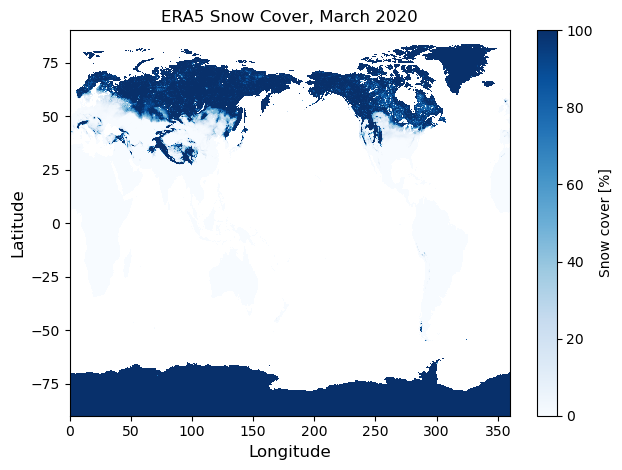

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
era5_sd_march.plot.imshow(ax=ax, cmap='Blues')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.set_title("ERA5 Snow Cover, March 2020", fontsize=12)
fig.tight_layout()

Now for a different example. Here, we will examine snow depths over Alaska only, and generate a state-wide time series for the month of March.

In [10]:
# Making bounds for Alaska
mask_lon = (ds.longitude >= -168.75+360) & (ds.longitude <= -136.01+360)
mask_lat = (ds.latitude >= 52.64) & (ds.latitude <= 71.59)

# Subset ERA5 data to Alaska lats/lons only
era5_alaska = ds.where(mask_lon & mask_lat, drop=True)

As before, we need to load the Alaska data into memory. Because we are looking over a much smaller spatial domain, `compute()` will be much faster.

In [11]:
# Load Alaska data into memory
era5_alaska = era5_alaska.compute().squeeze()

Again, we can make a map figure showing snow depth over the state of Alaska, this time for March 1, 2020:

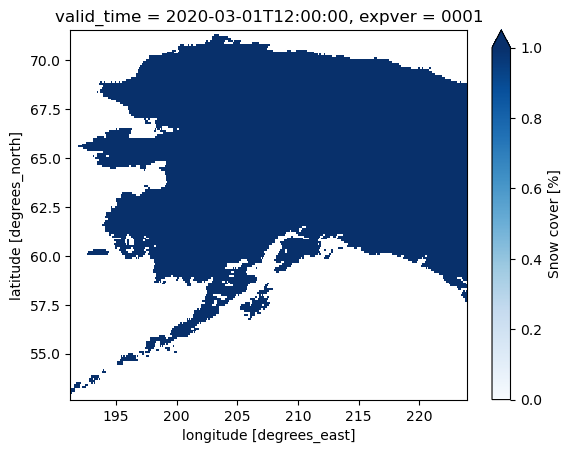

In [12]:
# Map plot of Alaska snow depths
era5_alaska['snowc'].isel(valid_time=0).plot.imshow(vmin=0, vmax=1, cmap="Blues")

We can also create a spatially-averaged time series of snow depth over the state of Alaska for the entire time period March 1 - April 30:

In [13]:
# Calculate spatial average of snow depths over Alaska
era5_sd_alaska = era5_alaska['snowc'].mean(('longitude', 'latitude'))

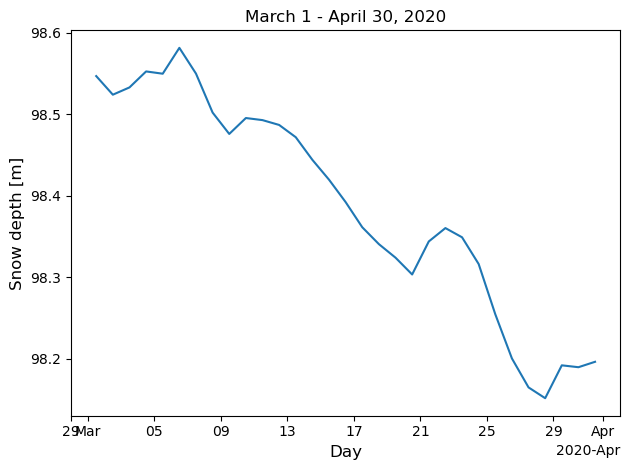

In [14]:
# Time series plot of Alaska snow depths
fig, ax = plt.subplots()
era5_sd_alaska.plot(ax=ax)
ax.set_xlabel("Day", fontsize=12)
ax.set_ylabel("Snow depth [m]", fontsize=12)
ax.set_title("March 1 - April 30, 2020", fontsize=12)
fig.tight_layout()